In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
from scipy.optimize import curve_fit
from scipy.constants import Boltzmann

In [12]:
pro = pd.read_excel(r'vjezba_2.xlsx', sheet_name='propusna_polarizacija')
pro

,Si,U/mV,+-,I/μA,+-.1,Ge,U/mV.1,+-.2,I/μA.1,+-.3
0,NaN,50,5,0.05,0.01,NaN,4,0.1,2.8,0.1
1,NaN,100,5,0.11,0.01,NaN,5,0.1,4.2,0.1
2,NaN,150,5,0.20,0.01,NaN,6,0.1,5.9,0.1
3,NaN,200,5,0.36,0.01,NaN,7,0.1,8.3,0.1
4,NaN,250,5,0.83,0.01,NaN,8,0.1,11.5,0.5
5,NaN,300,5,2.60,0.05,NaN,9,0.1,15.0,0.5


In [13]:
x = np.array(pro['U/mV'])/10
y = list(pro['I/μA'])
greske_x = list(pro['+-'])
greske_y = list(pro['+-.1'])
x2 = list(pro['U/mV.1'])
y2 = list(pro['I/μA.1'])
greske_x2 = list(pro['+-.2'])
greske_y2 = list(pro['+-.3'])

ts1 = np.linspace(5, 30, 100)
ts2 = np.linspace(4, 9, 100)

In [14]:
def funkcija(u, I, a):
    return I*(np.exp(u*a)-1)


pars1, cov1 = curve_fit(funkcija, x, y)
pars2, cov2 = curve_fit(funkcija, x2, y2)
print(pars1)
print(pars2)

[0.00490061 0.2089869 ]
[1.52717757 0.26554953]


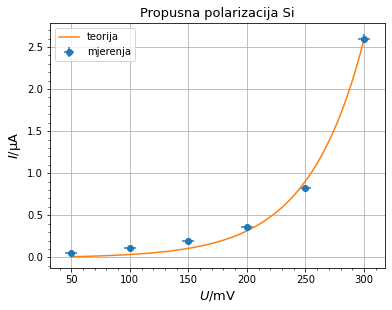

In [15]:
fig1, ax = plt.subplots(figsize=(6,4.5))
ax.set_title('Propusna polarizacija Si', fontsize = 13)
ax.set_xlabel(r'$ U \mathrm{/ mV} $', fontsize = 13)
ax.set_ylabel(r'$ I \mathrm{/ \mu A} $', fontsize = 13)
ax.errorbar(x*10, y, xerr=greske_x, yerr = greske_y, fmt='o', label = 'mjerenja')
ax.plot(ts1*10, funkcija(ts1, *pars1) , label = 'teorija')
ax.legend()
ax.xaxis.set_minor_locator(MultipleLocator(10))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.grid()
fig1.savefig("ppSi.png")

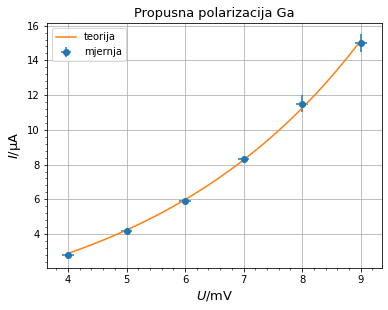

In [16]:
fig2, ex = plt.subplots(figsize=(6,4.5))
ex.set_title('Propusna polarizacija Ga', fontsize = 13)
ex.set_xlabel(r'$ U \mathrm{/ mV} $', fontsize = 13)
ex.set_ylabel(r'$ I \mathrm{/ \mu A} $', fontsize = 13)
ex.errorbar(x2, y2, xerr=greske_x2, yerr = greske_y2, fmt='o', label = 'mjernja')
ex.plot(ts2, funkcija(ts2, *pars2) , label = 'teorija')
ex.legend()
ex.xaxis.set_minor_locator(MultipleLocator(0.2))
ex.yaxis.set_minor_locator(MultipleLocator(0.4))
ex.grid()
fig2.savefig("ppGa.png")

In [7]:
nep = pd.read_excel(r'vjezba_2.xlsx', sheet_name='nepropusna_polarizacija')
nep

,Si,U/V,+-,I/μA,+-.1,Ge,U/V.1,+-.2,I/μA.1,+-.3
0,NaN,0.5,0.1,0,0.01,NaN,0.5,0.1,1.6,0.1
1,NaN,1.0,0.1,0,0.01,NaN,1.0,0.1,2.0,0.1
2,NaN,2.0,0.1,0,0.01,NaN,2.0,0.1,2.5,0.1
3,NaN,3.0,0.1,0,0.01,NaN,3.0,0.1,2.8,0.1
4,NaN,4.0,0.1,0,0.01,NaN,4.0,0.1,3.2,0.1
5,NaN,5.0,0.1,0,0.01,NaN,6.0,0.1,3.8,0.1
6,NaN,6.0,0.1,0,0.01,NaN,8.0,0.1,4.4,0.1
7,NaN,7.0,0.1,0,0.01,NaN,NaN,NaN,NaN,NaN
8,NaN,8.0,0.1,0,0.01,NaN,NaN,NaN,NaN,NaN


In [17]:
x = np.array(nep['U/V'])*(-1)
y = list(nep['I/μA'])
greske_x = list(nep['+-'])
greske_y = list(nep['+-.1'])
x2 = np.array(nep['U/V.1'])*(-1)
y2 = list(nep['I/μA.1'])
greske_x2 = list(nep['+-.2'])
greske_y2 = list(nep['+-.3'])

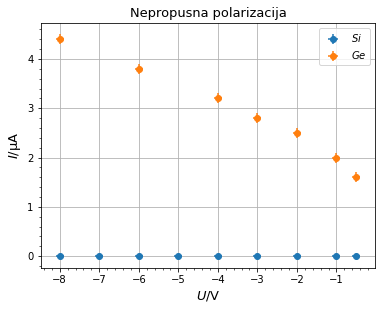

In [18]:
fig3, ix = plt.subplots(figsize=(6,4.5))
ix.set_title('Nepropusna polarizacija', fontsize = 13)
ix.set_xlabel(r'$ U \mathrm{/ V} $', fontsize = 13)
ix.set_ylabel(r'$ I \mathrm{/ \mu A} $', fontsize = 13)
ix.errorbar(x, y, xerr=greske_x, yerr = greske_y, fmt='o', label = r'$ Si $')
ix.errorbar(x2, y2, xerr=greske_x2, yerr = greske_y2, fmt='o', label = r'$ Ge $')
ix.legend()
ix.xaxis.set_minor_locator(MultipleLocator(0.2))
ix.yaxis.set_minor_locator(MultipleLocator(0.2))
ix.grid()
fig3.savefig("nepropusna_polarizacija.png")

In [4]:
zab = pd.read_excel(r'vjezba_2.xlsx', sheet_name='zabranjena_vrpca')
zab

,t/ oC,+-,I/μA,+-.1,T/K,1/T,ln(I/T3)
0,23.6,0.05,0.025,0.005,296.75,0.003370,-15.019232
1,25.0,0.05,0.030,0.005,298.15,0.003354,-14.946183
2,27.0,0.05,0.030,0.005,300.15,0.003332,-14.954894
3,29.0,0.05,0.035,0.005,302.15,0.003310,-14.896600
4,31.0,0.05,0.040,0.005,304.15,0.003288,-14.847203
5,33.0,0.05,0.045,0.005,306.15,0.003266,-14.804590
6,35.0,0.05,0.055,0.005,308.15,0.003245,-14.725924
7,37.0,0.05,0.065,0.005,310.15,0.003224,-14.661802
8,39.0,0.05,0.080,0.005,312.15,0.003204,-14.580000
9,41.0,0.05,0.110,0.005,314.15,0.003183,-14.450019


In [5]:
x = np.array(zab['ln(I/T3)'])
y = np.array(zab['1/T'])
greske_T = np.array(zab['+-'])
greske_I = np.array(zab['+-.1'])

In [17]:
def func(y, Eg, K):
    return np.log(K) - y*Eg/(8.617333262e-5)

ts3 = np.linspace(-15.01, -13.44, 100)
pars3, cov3 = curve_fit(func, x, y)
print(pars3)
print(x)

[3.05066059e-08 9.98061631e-01]
[-15.01923217 -14.94618319 -14.95489379 -14.89659975 -14.84720347
 -14.80459028 -14.72592383 -14.661802   -14.58000003 -14.45001851
 -14.38573621 -14.3037758  -14.21503052 -14.1262344  -14.06984008
 -13.9961841  -13.92496794 -13.8571639  -13.80057478 -13.76564442
 -13.74709043 -13.71809646 -13.70291682 -13.67837035 -13.67072407
 -13.64466515 -13.629664   -13.61157309 -13.59879039 -13.56838049
 -13.55798883 -13.5318611  -13.49918854 -13.47254549 -13.44980922]


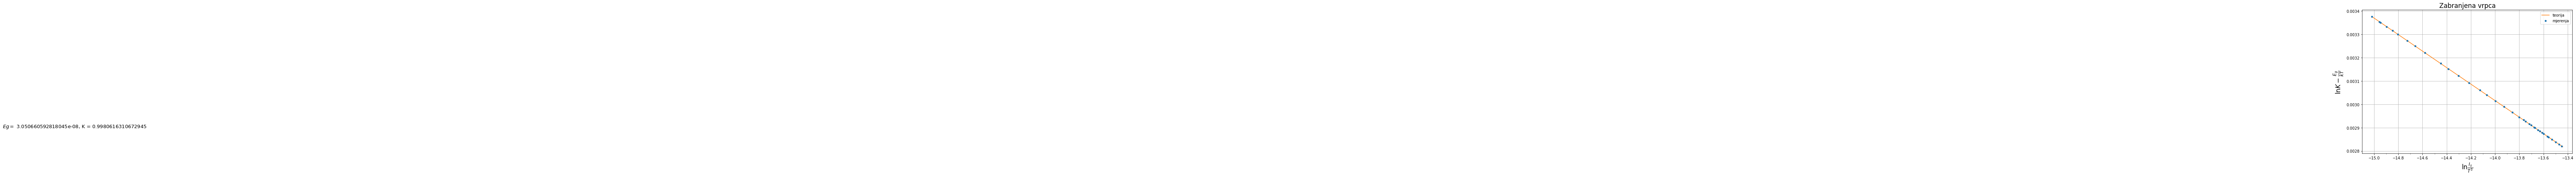

In [18]:
fig4, ux = plt.subplots(figsize=(10,7))
ux.set_title('Zabranjena vrpca', fontsize = 17)
ux.set_xlabel(r'$ \ln{\frac{I_{s}}{T^{3}}} $', fontsize = 17)
ux.set_ylabel(r'$ \ln{K} - \frac{E_{g}}{kT} $', fontsize = 17)
ux.errorbar(x, func(x, *pars3) , fmt='o', label = 'mjerenja', markersize='4')
ux.plot(ts3, func(ts3, *pars3) , label = 'teorija')
ux.legend()
ux.text(-34.6, 0.0029, r'$ Eg =$ {}, K = {}'.format(pars3[0], pars3[1]), fontsize=13)
ux.xaxis.set_minor_locator(MultipleLocator(0.1))
ux.yaxis.set_minor_locator(MultipleLocator(0.2))
ux.grid()
fig4.savefig("zabranjena_vrpca.png")